# Практическая работа 2. Источники данных. Извлечение данных
# Упражнение 2 Вариант 1

ФИО: Алексеев Константин Владимирович

Группа: БД-231м

## Задание 2.3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы

Тема - **Торговля**. На сайте Правительства Москвы большое количество данных по этой теме. Возьмем данные о [межрегиональных ярмарках](https://data.mos.ru/opendata/62061?isDynamic=false)


In [1]:
# Импорт стандартных пакетов
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Для парсинга веб-страниц
import requests
import json

Так как api ключ является личной информации, то его не следует выкладывать куда попало, поэтому сохраним его у себя локально и будет загружать его. В git его добавлять не будем.

В этой же директории находится пример (`api-key.json.example`) того, как должен выглядеть `api-key.json` файл. При необходимости может ввести свой ключ и прогнать ноутбук

In [2]:
api_key_filepath = 'api-key.json'

with open(api_key_filepath, 'r') as f:
    api_key = json.load(f)['api-key']


url = f'https://apidata.mos.ru/v1/datasets/62061/features?api_key={api_key}'
headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

In [3]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/62061/features?api_key=55593fc4-3c80-4266-94de-f236f2646b17


In [4]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [5]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [6]:
df

,type,geometry.coordinates,geometry.type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.FairName,properties.attributes.FairStatus,properties.attributes.FairTotalArea,properties.attributes.SeatsNumber,properties.attributes.FairType,properties.attributes.Goods,properties.attributes.AdmArea,properties.attributes.District,properties.attributes.WorkingHours,properties.attributes.FunctionalZoning,properties.attributes.AdditionalInformation,properties.attributes.global_id,properties.rowId,properties.releaseNumber,properties.versionNumber
0,Feature,"[37.880478, 55.714230745]",Point,62061,0,"Святоозерская ул., вл.1",Действующий,597.00,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Восточный административный округ,район Косино-Ухтомский,"[{'is_deleted': 0, 'global_id': 1, 'DayOfWeek'...",dbee12cc-3691-4620-94f5-38820045c823,,1031068007,None,65,1
1,Feature,"[37.866786, 55.743804754]",Point,62061,0,"Городецкая ул, вл.1",Действующий,692.40,20,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Восточный административный округ,район Новокосино,"[{'is_deleted': 0, 'global_id': 8, 'DayOfWeek'...",96ba5060-ebae-43ef-9ecd-297bc0366cdb,,1031068008,None,65,1
2,Feature,"[37.496003, 55.694114]",Point,62061,0,"Раменки ул, вл. 3",Действующий,1279.00,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Западный административный округ,район Раменки,"[{'is_deleted': 0, 'global_id': 15, 'DayOfWeek...",cddb6754-2ac4-4b80-bf37-5794df82fef9,,1031068009,None,65,1
3,Feature,"[37.794936, 55.715024746]",Point,62061,0,"Академика Скрябина ул., вл. 4",Действующий,633.00,14,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Юго-Восточный административный округ,Рязанский район,"[{'is_deleted': 0, 'global_id': 22, 'DayOfWeek...",36959661-42e7-46a5-8be6-6e39e57aa1e1,,1031068010,None,65,1
4,Feature,"[37.708287, 55.870954791]",Point,62061,0,"Ярославское шоссе, вл. 111",Действующий,742.10,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Северо-Восточный административный округ,Ярославский район,"[{'is_deleted': 0, 'global_id': 29, 'DayOfWeek...",f17c4872-2e6c-4f13-ba50-7410eabda4f4,,1031068011,None,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Feature,"[37.470069, 55.674402]",Point,62061,0,"Мичуринский пр-т, Олимпийская деревня, вл. 4",Действующий,423.70,14,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Западный административный округ,район Тропарёво-Никулино,"[{'is_deleted': 0, 'global_id': 559, 'DayOfWee...",063261b1-c782-4d45-bdc3-4b3e2f14df89,,2622005588,None,65,1
66,Feature,"[37.467845, 55.810715773]",Point,62061,0,"Авиационная ул., вл. 24",Действующий,566.06,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Северо-Западный административный округ,район Щукино,"[{'is_deleted': 0, 'global_id': 573, 'DayOfWee...",314530b5-b44c-4991-972e-b2dd7e55457d,,2631590727,None,65,1
67,Feature,"[37.334681, 55.490483681]",Point,62061,0,"Кварцевая ул., д. 2, к. 3",Действующий,2200.00,18,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Новомосковский административный округ,поселение Десеновское,"[{'is_deleted': 0, 'global_id': 587, 'DayOfWee...",caa7329b-075b-4557-aeb2-2fc9883a247f,,2639585335,None,65,1
68,Feature,"[37.661408, 55.885856795]",Point,62061,0,"Греков ул., у ст.м. Медведково",Действующий,563.17,14,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Северо-Восточный административный округ,район Северное Медведково,"[{'is_deleted': 0, 'global_id': 594, 'DayOfWee...",250fa228-d8f5-4805-8bb8-4a8117a360b2,,2640958235,None,65,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   type                                         70 non-null     object 
 1   geometry.coordinates                         70 non-null     object 
 2   geometry.type                                70 non-null     object 
 3   properties.datasetId                         70 non-null     int64  
 4   properties.attributes.is_deleted             70 non-null     int64  
 5   properties.attributes.FairName               70 non-null     object 
 6   properties.attributes.FairStatus             70 non-null     object 
 7   properties.attributes.FairTotalArea          70 non-null     float64
 8   properties.attributes.SeatsNumber            70 non-null     int64  
 9   properties.attributes.FairType               70 non-null     object 
 10  prop

In [8]:
df = df.drop(columns=df.columns[:3])
df = df.iloc[:, :-4]

In [9]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   properties.datasetId   70 non-null     int64  
 1   is_deleted             70 non-null     int64  
 2   FairName               70 non-null     object 
 3   FairStatus             70 non-null     object 
 4   FairTotalArea          70 non-null     float64
 5   SeatsNumber            70 non-null     int64  
 6   FairType               70 non-null     object 
 7   Goods                  70 non-null     object 
 8   AdmArea                70 non-null     object 
 9   District               70 non-null     object 
 10  WorkingHours           70 non-null     object 
 11  FunctionalZoning       70 non-null     object 
 12  AdditionalInformation  70 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 7.2+ KB


In [11]:
df.head(3)

,properties.datasetId,is_deleted,FairName,FairStatus,FairTotalArea,SeatsNumber,FairType,Goods,AdmArea,District,WorkingHours,FunctionalZoning,AdditionalInformation
0,62061,0,"Святоозерская ул., вл.1",Действующий,597.0,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Восточный административный округ,район Косино-Ухтомский,"[{'is_deleted': 0, 'global_id': 1, 'DayOfWeek'...",dbee12cc-3691-4620-94f5-38820045c823,
1,62061,0,"Городецкая ул, вл.1",Действующий,692.4,20,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Восточный административный округ,район Новокосино,"[{'is_deleted': 0, 'global_id': 8, 'DayOfWeek'...",96ba5060-ebae-43ef-9ecd-297bc0366cdb,
2,62061,0,"Раменки ул, вл. 3",Действующий,1279.0,30,Межрегиональная ярмарка,Сельскохозяйственные и продовольственные товары,Западный административный округ,район Раменки,"[{'is_deleted': 0, 'global_id': 15, 'DayOfWeek...",cddb6754-2ac4-4b80-bf37-5794df82fef9,


Распределение общей площади ярморок


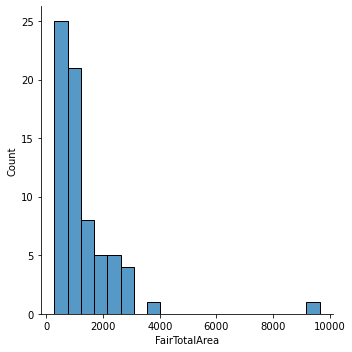

In [12]:
print('Распределение общей площади ярморок')
sns.displot(df['FairTotalArea'])

In [13]:
print('Топ 5 самых больших ярморок')
df[['FairName', 'FairTotalArea']].sort_values(by = 'FairTotalArea', ascending = False).head(5)

Топ 5 самых больших ярморок


,FairName,FairTotalArea
22,"Профсоюзная ул, вл. 41",9645.0
41,"Россошанский проезд, вл.8, к.2",3988.0
20,"Старокачаловская ул., вл. 5а",3040.0
11,"Домодедовская ул, вл. 12",3027.0
18,"Семеновская площадь, вл. 4",2959.0


In [14]:
df['FairStatus'].value_counts()

Действующий    70
Name: FairStatus, dtype: int64

Все ярмарки являются действующими!

Посмотрим количество ярморок в разрезе округа и района

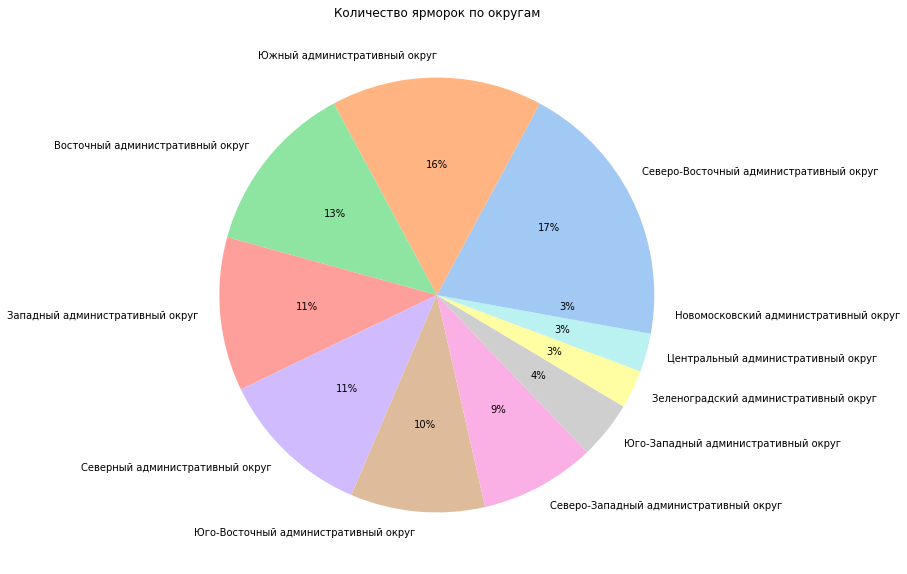

In [15]:
data = df['AdmArea'].value_counts().values
labels = df['AdmArea'].value_counts().index.to_list()

colors = sns.color_palette('pastel')[0:len(data)]

plt.figure(figsize=(10, 10))

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Количество ярморок по округам")
plt.show()


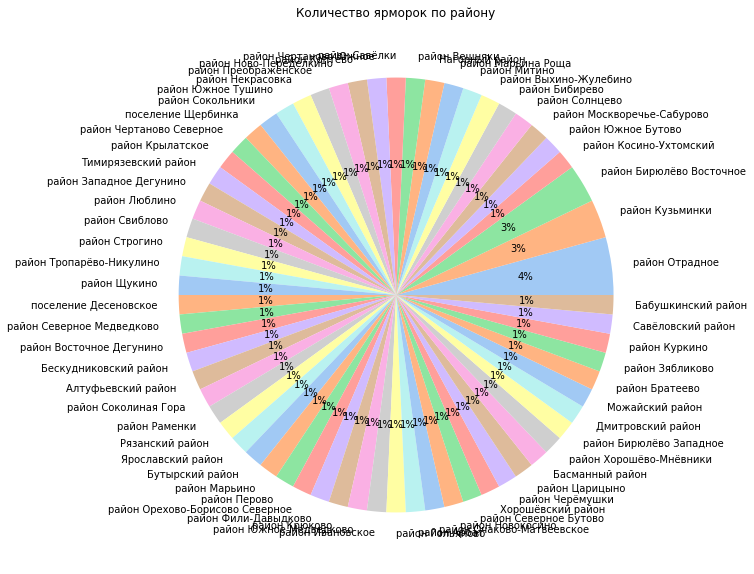

In [16]:
data = df['District'].value_counts().values
labels = df['District'].value_counts().index.to_list()

colors = sns.color_palette('pastel')[0:len(data)]

plt.figure(figsize=(10, 10))

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Количество ярморок по району")
plt.show()


Больше всего ярморок в Отрадном, Кузьминках и Бирюлёво!. По остальным районам ярмарки распределены достаточно равномерно

In [17]:
df['Goods'].value_counts()

Сельскохозяйственные и продовольственные товары    70
Name: Goods, dtype: int64

Напоследок посмотрим среднее количество доступных мест (для размещения ваших ярморочных столов) в разрезе округов

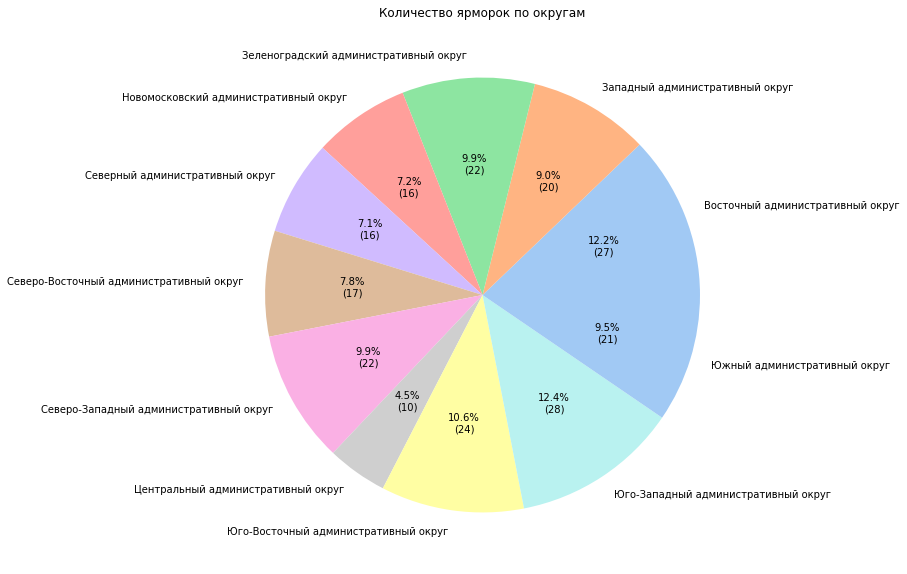

In [18]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


data = df.groupby(['AdmArea'])['SeatsNumber'].mean().values
labels = df.groupby(['AdmArea'])['SeatsNumber'].mean().index.to_list()

colors = sns.color_palette('pastel')[0:len(data)]

plt.figure(figsize=(10, 10))

plt.pie(data, labels = labels, colors = colors, autopct=autopct_format(data))
plt.title("Количество ярморок по округам")
plt.show()

Больше всего мест в ЮВАО и ЮЗАО. 

Меньше всего мест в ЦАО.

![Архитектура решения](./resources/image.png)